# Prevendo chuva - Conjunto de dados desbalanceados


In [1]:
# Pacotes básicos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving A602.pickle to A602.pickle
Saving A602_test.parquet.gzip to A602_test.parquet.gzip
Saving A602_train.parquet.gzip to A602_train.parquet.gzip
Saving A602_val.parquet.gzip to A602_val.parquet.gzip
Saving A621.pickle to A621.pickle
Saving A621_test.parquet.gzip to A621_test.parquet.gzip
Saving A621_train.parquet.gzip to A621_train.parquet.gzip
Saving A621_val.parquet.gzip to A621_val.parquet.gzip
Saving A627.pickle to A627.pickle
Saving A627_test.parquet.gzip to A627_test.parquet.gzip
Saving A627_train.parquet.gzip to A627_train.parquet.gzip
Saving A627_val.parquet.gzip to A627_val.parquet.gzip
Saving A636.pickle to A636.pickle
Saving A636_test.parquet.gzip to A636_test.parquet.gzip
Saving A636_train.parquet.gzip to A636_train.parquet.gzip
Saving A636_val.parquet.gzip to A636_val.parquet.gzip
Saving A652.pickle to A652.pickle
Saving A652_test.parquet.gzip to A652_test.parquet.gzip
Saving A652_train.parquet.gzip to A652_train.parquet.gzip
Saving A652_val.parquet.gzip to A652_val.par

In [3]:
file_import= 'A602_'

df_602train = pd.read_parquet(file_import + 'train.parquet.gzip')
df_602test = pd.read_parquet(file_import + 'test.parquet.gzip')
df_602val = pd.read_parquet(file_import + 'val.parquet.gzip')



In [4]:
df_602train['precipitation'] = df_602train['precipitation'].map(lambda x: 1 if x != 0 else 0)

df_602test['precipitation'] = df_602test['precipitation'].map(lambda x: 1 if x != 0 else 0)

df_602val['precipitation'] = df_602val['precipitation'].map(lambda x: 1 if x != 0 else 0)

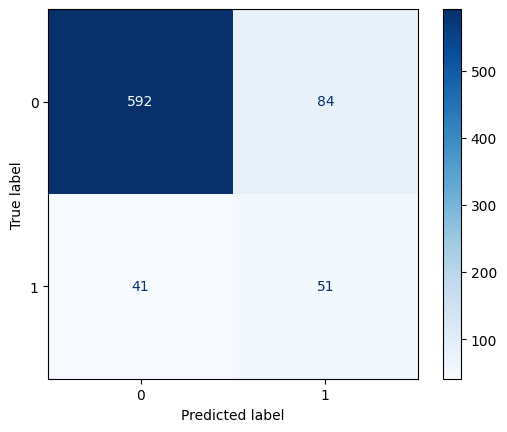

Test Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.90       676
           1       0.38      0.55      0.45        92

    accuracy                           0.84       768
   macro avg       0.66      0.72      0.68       768
weighted avg       0.87      0.84      0.85       768



In [5]:
#Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

# Dividindo o dataset entre features e target (y)

X_train = df_602train.drop('precipitation', axis=1)
y_train = df_602train['precipitation']

X_test = df_602test.drop('precipitation', axis=1)
y_test = df_602test['precipitation']

#Treinando modelo
boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=50,
    max_depth=5,
    random_state=1)

boost.fit(X_train, y_train)

#Predição
y_pred = boost.predict(X_test)

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)

In [6]:
precision_original =  round(precision_score(y_test, y_pred), 4)
recall_original = round(recall_score(y_test, y_pred), 4)
F1_score_original =  round(f1_score(y_test, y_pred), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original

,Original Dataset
Precision,0.3778
Recall,0.5543
F1_score,0.4493


In [7]:
#Alteração de Limiar

cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original
thresholds = [ j/20 for j in range(1,16)]

for i in thresholds:
    y_pred_new_threshold = (boost.predict_proba(X_test)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_test, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_test, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_test, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i)
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)


adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1

Metrics,Precision,Recall,F1_score
Original,0.3778,0.5543,0.4493
Threshold: 0.05,0.1822,0.9565,0.3061
Threshold: 0.1,0.2096,0.9022,0.3402
Threshold: 0.15,0.2139,0.8043,0.3379
Threshold: 0.2,0.2367,0.7717,0.3622
Threshold: 0.25,0.2519,0.7283,0.3743
Threshold: 0.3,0.2727,0.6848,0.3901
Threshold: 0.35,0.2959,0.6304,0.4028
Threshold: 0.4,0.3314,0.6196,0.4318
Threshold: 0.45,0.3464,0.5761,0.4327


In [8]:
precision_changedthreshold =  round(precision_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Original Dataset', 'Threshold Changed Dataset']
changedthreshold

,Original Dataset,Threshold Changed Dataset
Precision,0.3778,0.5490
Recall,0.5543,0.3043
F1_score,0.4493,0.3916


In [9]:
#Oversampling

from sklearn.utils import resample

train_data = pd.concat([X_train,y_train],axis=1)

Response_Zero = train_data[train_data.precipitation==0]
Response_One = train_data[train_data.precipitation==1]

upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

before_oversampling = y_train.value_counts()
print(before_oversampling)

after_oversampling = upsampled['precipitation'].value_counts()
print(after_oversampling)



precipitation
0    9366
1     914
Name: count, dtype: int64
precipitation
0    9366
1    9366
Name: count, dtype: int64


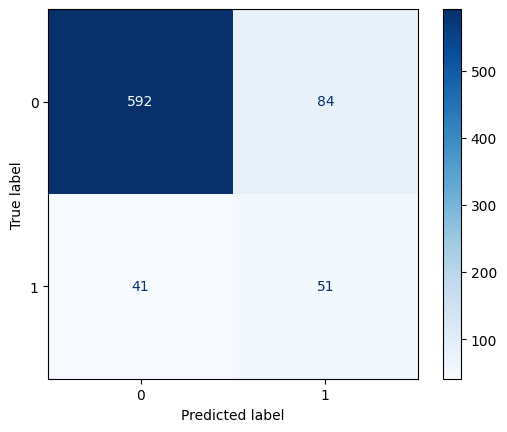

Test Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       374
           1       0.99      0.34      0.51       394

    accuracy                           0.66       768
   macro avg       0.79      0.67      0.62       768
weighted avg       0.80      0.66      0.62       768



In [10]:
#Training the model on up-sampled data
X_train_upsampled = upsampled.drop(columns = ['precipitation'])
y_train_upsampled = upsampled['precipitation']

boost_upsampled = GradientBoostingClassifier()

boost_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled = boost_upsampled.predict(X_train_upsampled)
test_upsampled = boost_upsampled.predict(X_test)

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(test_upsampled, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)

In [11]:
#New efficacy metrics
precision_upsampled =  round(precision_score(y_test, test_upsampled), 4)
recall_upsampled = round(recall_score(y_test, test_upsampled), 4)
F1_upsampled =  round(f1_score(y_test, test_upsampled), 4)
metrics_upsampled = [precision_upsampled, recall_upsampled, F1_upsampled]

upsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold, metrics_upsampled)))
upsampled.index = ['Precision', 'Recall', 'F1_score']
upsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset']
upsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset
Precision,0.3778,0.5490,0.2183
Recall,0.5543,0.3043,0.9348
F1_score,0.4493,0.3916,0.3539


In [12]:
#Undersampling

downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

#combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])


before_upsampling = y_train.value_counts()
print(before_upsampling)

after_upsampling = downsampled['precipitation'].value_counts()
print(after_upsampling)


precipitation
0    9366
1     914
Name: count, dtype: int64
precipitation
0    914
1    914
Name: count, dtype: int64


In [13]:
#Training the model on down-sampled data and testing on the original test dataset
X_train_downsampled = downsampled.drop(columns = ['precipitation'])
y_train_downsampled = downsampled['precipitation']

xgb_downsampled = GradientBoostingClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled = xgb_downsampled.predict(X_train_downsampled)
test_downsampled = xgb_downsampled.predict(X_test)

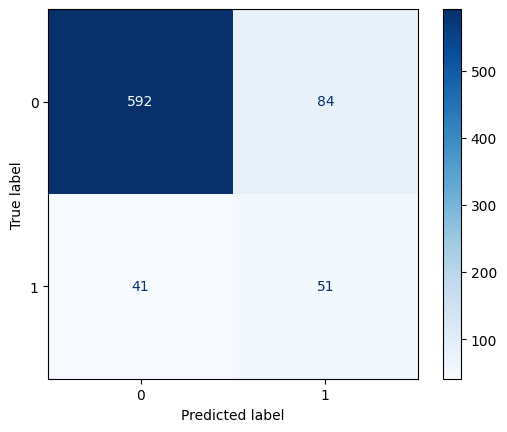

Test Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74       374
           1       0.99      0.34      0.51       394

    accuracy                           0.66       768
   macro avg       0.79      0.67      0.62       768
weighted avg       0.80      0.66      0.62       768



In [14]:
#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(test_upsampled, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)

In [15]:
#Final Metrics

precision_downsampled =  round(precision_score(y_test, test_downsampled), 4)
recall_downsampled = round(recall_score(y_test, test_downsampled), 4)
F1_downsampled =  round(f1_score(y_test, test_downsampled), 4)
metrics_downsampled = [precision_downsampled, recall_downsampled, F1_downsampled]

downsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled)))
downsampled.index = ['Precision', 'Recall', 'F1_score']
downsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset']
downsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset
Precision,0.3778,0.5490,0.2183,0.2005
Recall,0.5543,0.3043,0.9348,0.9130
F1_score,0.4493,0.3916,0.3539,0.3288


Calibração de Modelos

In [16]:
df_652train = pd.read_parquet('A652_train.parquet.gzip')
df_652test = pd.read_parquet('A652_test.parquet.gzip')
df_652val = pd.read_parquet('A652_val.parquet.gzip')

In [17]:
df_652train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10059 entries, 2019-12-04 00:00:00 to 2021-05-17 03:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          10059 non-null  float64
 1   barometric_pressure  10059 non-null  float64
 2   relative_humidity    10059 non-null  float64
 3   wind_direction_u     10059 non-null  float64
 4   wind_direction_v     10059 non-null  float64
 5   hour_sin             10059 non-null  float64
 6   hour_cos             10059 non-null  float64
 7   precipitation        10059 non-null  float64
dtypes: float64(8)
memory usage: 707.3 KB


In [18]:
df_652test.shape

(9594, 8)

In [19]:
#transformar em um problema de classificação binária

df_652train['precipitation'] = df_652train['precipitation'].map(lambda x: 1 if x != 0 else 0)

df_652test['precipitation'] = df_652test['precipitation'].map(lambda x: 1 if x != 0 else 0)

df_652val['precipitation'] = df_652val['precipitation'].map(lambda x: 1 if x != 0 else 0)


In [20]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

df_652trainval = pd.concat([df_652train, df_652val])

#dividindo conjunto
X_train = df_652trainval.drop('precipitation', axis=1)
y_train = df_652trainval['precipitation']

X_test = df_652test.drop('precipitation', axis=1)
y_test = df_652test['precipitation']

#Treinando modelo
boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=50,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)

#Predição
y_pred = boost.predict_proba(X_test)[:,1]

In [21]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

def calibration_data(y_true, y_pred):
    df = pd.DataFrame({'y_true':y_true, 'y_pred_bucket': (y_pred//0.05)*0.05 + 0.025})
    cdf = df.groupby(['y_pred_bucket'], as_index=False).agg({'y_true':["mean","count"]})
    return cdf.y_true.values[:,0][cdf.y_true.values[:,1]>10], cdf.y_pred_bucket.values[cdf.y_true.values[:,1]>10]

prob_true, prob_pred  = calibration_data(y_test, y_pred) #adaptando ao formato esperado

chart_df = pd.DataFrame({
    "actuals": prob_true,
    "predicted": prob_pred,
    "expected": prob_pred
})
fig = px.line(
        data_frame = chart_df,
        markers = True,
        x = "predicted",
        y = ["actuals", "expected"],
        template = "plotly_dark")
fig.update_layout(
        title  = {"text": "Calibration Plot: Without calibration", "y": 0.95, "x": 0.5},
        xaxis_title="Predicted Probability",
        yaxis_title="Actual Probability",
        font = dict(size=15)
)
fig.show(renderer='colab')

In [22]:
# training model using gradient boosting and isotonic regression for calibration
calibrated_boost = CalibratedClassifierCV(boost, method = 'isotonic')
calibrated_boost.fit(X_train, y_train)

#getting the output to visualize on test data
prob_true_calib, prob_pred_calib  = calibration_curve(y_true = y_test,
                                                        y_prob = calibrated_boost.predict_proba(X_test)[:,1],
                                                        n_bins = 20)

chart_df = pd.DataFrame({
    "actuals": prob_true_calib,
    "predicted": prob_pred_calib,
    "expected": prob_pred_calib
})
fig = px.line(
        data_frame = chart_df,
        markers = True,
        x = "predicted",
        y = ["actuals", "expected"],
        template = "plotly_dark")
fig.update_layout(
        title  = {"text": "Calibration Plot: With calibration", "y": 0.95, "x": 0.5},
        xaxis_title="Predicted Probability",
        yaxis_title="Actual Probability",
        font = dict(size=15)
)
fig.show(renderer='colab')

In [ ]:
# Análise Resultados